# Tarea 2. 

Orlando Pereira Guzmán

# Pregunta 1

Determinar los autovalores y autovectores de la matriz brindada.

In [5]:
import numpy as np
import numpy.linalg as LA
import pandas as pd

A=np.array([
	[0, 0, 0, 1, 0, 0],
	[0, 0, 0, 0, 1, 0],
	[0, 0, 0, 0, 0, 1],
	[-90.0465, 22.7276, 67.3188, -0.3333, 0, 0],
	[22.8521, -97.0081, 74.1560, 0, -0.3333, 0],
	[9.5048, 10.2589, -19.7637, 0, 0, -0.3333]
	])

Autovalores, Autovectores=LA.eig(A)

In [31]:
display(pd.DataFrame(Autovalores.round(8), index= ['lambda_'+str(x+1) for x in range(len(Autovalores))]))

,0
lambda_1,(-0.16665+10.80955082j)
lambda_2,(-0.16665-10.80955082j)
lambda_3,(-0.16665+9.48242351j)
lambda_4,(-0.16665-9.48242351j)
lambda_5,(-3.301e-05+0j)
lambda_6,(-0.33326699+0j)


In [30]:
display(pd.DataFrame(Autovectores.round(8), columns=['v_'+str(i+1) for i in range(len(Autovalores))], index= [i+1 for i in range(len(Autovalores))]))

,v_1,v_2,v_3,v_4,v_5,v_6
1,(0.0008671+0.05624354j),(0.0008671-0.05624354j),(-0.00147082-0.08369019j),(-0.00147082+0.08369019j),(-0.5773499+0j),(-0.54773311+0j)
2,(-0.00112379-0.07289342j),(-0.00112379+0.07289342j),(-0.00105225-0.05987355j),(-0.00105225+0.05987355j),(-0.57735042+0j),(-0.5477336+0j)
3,(3.385e-05+0.00219567j),(3.385e-05-0.00219567j),(0.00035302+0.02008673j),(0.00035302-0.02008673j),(-0.57735049+0j),(-0.54773367+0j)
4,(-0.60811186+0j),(-0.60811186-0j),(0.79383096+0j),(0.79383096-0j),(1.906e-05+0j),(0.18254136+0j)
5,(0.78813245+0j),(0.78813245-0j),(0.56792172-0j),(0.56792172+0j),(1.906e-05+0j),(0.18254153+0j)
6,(-0.02373988+0j),(-0.02373988-0j),(-0.19052971+0j),(-0.19052971-0j),(1.906e-05+0j),(0.18254155+0j)


# Pregunta 2
Matriz de magnitudes de participación

In [32]:
W=LA.inv(Autovectores) 

# Cálculo de factores de participación 

P=np.zeros((6,6),dtype='complex')
for k in range(6): # se mueve para las variables de estado
    for i in range (6): # se mueve para los valores propios
        P[k,i]= Autovectores[k,i]*W[i,k]

Factor_Part = abs(P) #Matriz de participación

In [38]:
display(pd.DataFrame(Factor_Part, columns=['lambda_'+str(x+1) for x in range(len(Autovalores))], index=['delta_G1','delta_G2','delta_G3', 'omega_G1', 'omega_G2', 'omega_G3']))

,lambda_1,lambda_2,lambda_3,lambda_4,lambda_5,lambda_6
delta_G1,0.185641,0.185641,0.259414,0.259414,0.110025,0.000011
delta_G2,0.312260,0.312260,0.133584,0.133584,0.108438,0.000011
delta_G3,0.002159,0.002159,0.107078,0.107078,0.781637,0.000077
omega_G1,0.185641,0.185641,0.259414,0.259414,0.000011,0.110025
omega_G2,0.312260,0.312260,0.133584,0.133584,0.000011,0.108438
omega_G3,0.002159,0.002159,0.107078,0.107078,0.000077,0.781637


# Pregunta 3
Cálculo de \xi y frecuencia para los modos

In [42]:
datos_preg_3 = pd.DataFrame(np.nan, columns = ['xi', 'f'], index= ['lambda_'+str(x+1) for x in range(len(Autovalores))])

for i in range(len(Autovalores)):
    sigma = np.real(Autovalores[i])
    omega = abs(np.imag(Autovalores[i]))
    
    omega_n = (np.sqrt(sigma*sigma + omega*omega))
    xi = -sigma / omega_n
    datos_preg_3.loc['lambda_'+str(i+1), 'xi'] = xi
    
    f = omega/(2*np.pi)
    datos_preg_3.loc['lambda_'+str(i+1), 'f'] = f

In [43]:
display(datos_preg_3)

,xi,f
lambda_1,0.015415,1.720393
lambda_2,0.015415,1.720393
lambda_3,0.017572,1.509175
lambda_4,0.017572,1.509175
lambda_5,1.000000,0.000000
lambda_6,1.000000,0.000000


Respuesta a preguntas a y c: Los valores de frecuencia y porcentaje de amortiguamiento son los que corresponden a $\lambda_1$ y $\lambda_2$ ($f = 1.7257$ y $\xi = 1.541\%$) y a $\lambda_3$ y $\lambda_4$ ($f = 1.5092$ y $\xi = 1.757\%$)

Respuesta a preguntas b y d: Según la matriz de participación, los estados asociados a $\lambda_1$ y $\lambda_2$ son $\delta_{G2}$ y $\omega_{G2}$, mientras que  en $\lambda_3$ y $\lambda_4$ son $\delta_{G1}$ y $\omega_{G1}$.

# Pregunta 4a. Modos 1 y 2 (Opcional)

PROBLEMA 4a: Primeros Autovalores 1-2


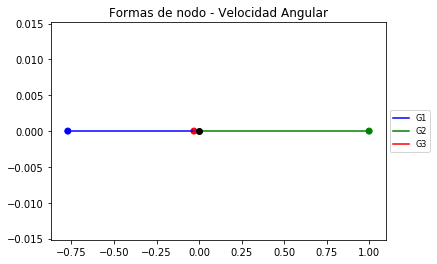

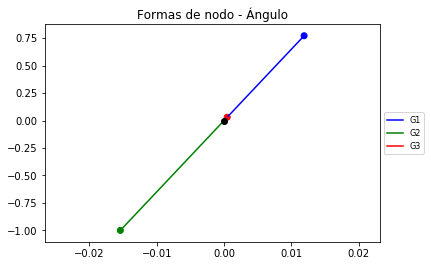

In [52]:
import matplotlib.pyplot as plt

# Encontrar mayor norma de los elementos de vr
def max_magnitude(vector):
    max_magnitude = 0
    for entry in vector:
        magnitude = abs(entry)
        if magnitude > max_magnitude:
            max_magnitude = magnitude
    
    return max_magnitude

#%% Parte 4a

# Valores propios
lambda_1 = Autovalores[0]
lambda_2 = Autovalores[1]

# Vectores propios asociados a lambda_y y lambda_s
v_1_omega = list(np.transpose(Autovectores)[0][3:]) #tomando en cuenta únicamente la velocidad angular 
v_2_omega = list(np.transpose(Autovectores)[1][3:]) #tomando en cuenta únicamente la velocidad angular 
v_1_ang = list(np.transpose(Autovectores)[0][0:3]) #tomando en cuenta únicamente los ángulos
v_2_ang = list(np.transpose(Autovectores)[1][0:3]) #tomando en cuenta únicamente los ángulos

# Normalizar vr y vs con respecto a la mayor norma
v_1_omega = [x/max_magnitude(v_1_omega) for x in v_1_omega]
v_2_omega = [x/max_magnitude(v_2_omega) for x in v_2_omega]

v_1_ang = [x/max_magnitude(v_1_ang) for x in v_1_ang]
v_2_ang = [x/max_magnitude(v_2_ang) for x in v_2_ang]

# Elegir vector (vr o vs)
analysed_vectors = [v_1_omega, v_1_ang]
#analysed_vectors = [v_1_omega, v_1_ang, v_2_omega, v_2_ang]

print('PROBLEMA 4a: Primeros Autovalores 1-2')

# Graficar formas de modo
for fig_n in range(len(analysed_vectors)):

    fig = plt.figure(fig_n)
    re = [x.real for x in analysed_vectors[fig_n]]
    im = [x.imag for x in analysed_vectors[fig_n]]
    labels = ['G1', 'G2', 'G3']
    colors = ['b', 'g', 'r']
    plt.scatter(re, im, color=colors)
    for i in range(3):
        #plt.text(re[i]-0.02, im[i]+0.02, labels[i], fontsize=9)
        plt.plot([0, re[i]], [0, im[i]], color = colors[i], label=labels[i])
    
    plt.plot(0, 0, color='k', marker='o')
    plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))
    
    if fig_n == 0:
        plt.title('Formas de nodo - Velocidad Angular')
    else:
        plt.title('Formas de nodo - Ángulo')
    
    

# Pregunta 4b. Modos 3 y 4

PROBLEMA 4b: Segundos Autovalores 3-4


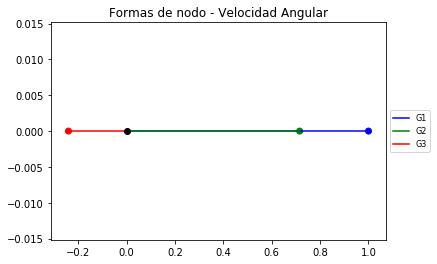

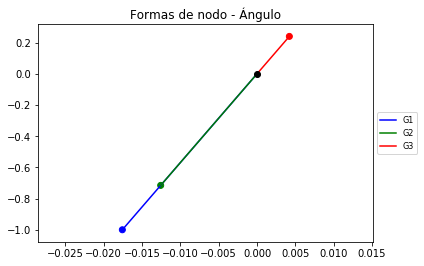

In [54]:
# Valores propios
lambda_1 = Autovalores[2]
lambda_2 = Autovalores[3]

# Vectores propios asociados a lambda_y y lambda_s
v_1_omega = list(np.transpose(Autovectores)[2][3:]) #tomando en cuenta únicamente la velocidad angular 
v_2_omega = list(np.transpose(Autovectores)[3][3:]) #tomando en cuenta únicamente la velocidad angular 
v_1_ang = list(np.transpose(Autovectores)[2][0:3]) #tomando en cuenta únicamente los ángulos
v_2_ang = list(np.transpose(Autovectores)[3][0:3]) #tomando en cuenta únicamente los ángulos 

# Normalizar vr y vs con respecto a la mayor norma
v_1_omega = [x/max_magnitude(v_1_omega) for x in v_1_omega]
v_2_omega = [x/max_magnitude(v_2_omega) for x in v_2_omega]

v_1_ang = [x/max_magnitude(v_1_ang) for x in v_1_ang]
v_2_ang = [x/max_magnitude(v_2_ang) for x in v_2_ang]

# Elegir vector (vr o vs)
analysed_vectors = [v_1_omega, v_1_ang]
#analysed_vectors = [v_1_omega, v_1_ang, v_2_omega, v_2_ang]

print('PROBLEMA 4b: Segundos Autovalores 3-4')

for fig_n in range(len(analysed_vectors)):

# Graficar formas de modo
    fig = plt.figure(fig_n)
    re = [x.real for x in analysed_vectors[fig_n]]
    im = [x.imag for x in analysed_vectors[fig_n]]
    labels = ['G1', 'G2', 'G3']
    colors = ['b', 'g', 'r']
    plt.scatter(re, im, color=colors)
    for i in range(3):
        #plt.text(re[i]-0.02, im[i]+0.02, labels[i], fontsize=9)
        plt.plot([0, re[i]], [0, im[i]], color = colors[i], label=labels[i])
    plt.plot(0, 0, color='k', marker='o')
    plt.legend(fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))
    if fig_n == 0:
        plt.title('Formas de nodo - Velocidad Angular')
    else:
        plt.title('Formas de nodo - Ángulo')